In [39]:
import pandas as pd

In [40]:
file = "./AdidasVsNike.csv"
data = pd.read_csv(file)
data.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


#### This dataset has 3268 rows and 10 columns.

In [41]:
data.shape

(3268, 10)

#### Checking for missing values in the dataset. (only 3 products with missing decription.)

In [42]:
data.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      3
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [43]:
data['Last Visited']=pd.to_datetime(data['Last Visited'])

#### Notice some of the values are 0 for Listing Price, we replace 0 in the Listing Price with the Sale Price instead.

In [44]:
zero = (data["Listing Price"] == 0)
data.loc[zero, "Listing Price"] = data["Sale Price"]
data

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15
...,...,...,...,...,...,...,...,...,...,...
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13 15:41:01
3264,Nike Phantom Venom Club IC,AO0578-717,4995,3497,0,Nike,The Nike Phantom Venom Club IC is engineered f...,0.0,0,2020-04-13 15:41:03
3265,Nike Mercurial Superfly 7 Academy TF,AT7978-414,8495,5947,0,Nike,The soft upper of the Nike Mercurial Superfly ...,5.0,1,2020-04-13 15:41:07
3266,Nike Air Max 98,AH6799-300,16995,16995,0,Nike,The Nike Air Max 98 features the OG design lin...,4.0,4,2020-04-13 15:41:19


#### Fill the missing decription with the string "No Description".

In [45]:
data["Description"].fillna("No Description", inplace = True)
data.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Description      0
Rating           0
Reviews          0
Last Visited     0
dtype: int64

In [46]:
data.Brand.unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

#### Here, I want to replace all products with brand name containing "Adidas adidas ORIGINALS" to "Adidas ORIGINALS". 

In [47]:
data.replace("Adidas Adidas ORIGINALS", "Adidas ORIGINALS", inplace = True)
data.Brand.unique()

array(['Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

### Objective 1: How many products per brand? (w/ Visualization)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# print(len(data["Brand"])) # 3268
total = len(data["Brand"])
nike = ["It's Nike!" for brand in data['Brand'] if "nike" in brand.lower()]
adidas = ["It's Adidas!" for brand in data['Brand'] if "adidas" in brand.lower()]
adidas_ori = ["It's Adidas ori!" for brand in data['Brand'] if "adidas original" in brand.lower()]
adidas_neo = ["It's Adidas neo!" for brand in data['Brand'] if "adidas core / neo" in brand.lower()]
adidas_sport = ["It's Adidas sport!" for brand in data['Brand'] if "adidas sport performance" in brand.lower()]
total_nike = len(nike) # 643
total_adidas = len(adidas) # 2625 
total_adidas_ori = len(adidas_ori)
total_adidas_neo = len(adidas_neo)
total_adidas_sport = len(adidas_sport)


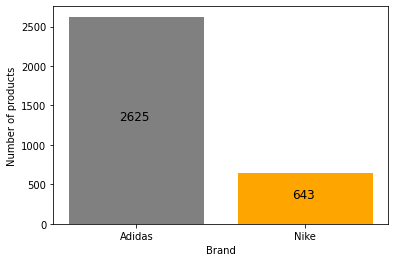

In [50]:
plt.bar(x = ["Adidas", "Nike"], height = [total_adidas, total_nike], color = ['grey','orange'])
plt.xlabel("Brand")
plt.ylabel("Number of products")
plt.text(-0.1, total_adidas/2, total_adidas, fontsize=12)
plt.text(0.92, total_nike/2, total_nike, fontsize=12)
plt.show()

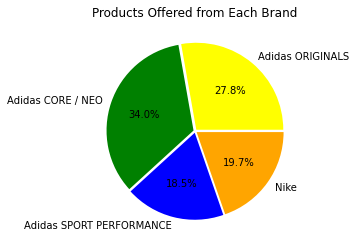

In [51]:
t = [total_adidas_ori, total_adidas_neo, total_adidas_sport, total_nike]
colors = ["yellow", "green", "blue", "orange"]
plt.title('Products Offered from Each Brand')
plt.pie(labels = ["Adidas ORIGINALS", "Adidas CORE / NEO", "Adidas SPORT PERFORMANCE", "Nike"], \
    x = t, autopct="%.1f%%", explode=[0.02]*4, colors=colors)
plt.show()

### Objective 2: Rate the products

In [52]:
max_rating = data["Rating"].max()
max_rating_product = data[data["Rating"] == max_rating]
ratings = max_rating_product[["Product Name", "Brand", "Reviews"]].sort_values(by=["Reviews"], ascending=False)

ratings

,Product Name,Brand,Reviews
267,Men's adidas Toe Side II Slippers,Adidas CORE / NEO,99
1800,Men's adidas Running Asweego Shoes,Adidas CORE / NEO,99
1849,MEN'S ADIDAS RUNNING NAYO 2.0 SHOES,Adidas CORE / NEO,97
1039,Men's adidas Sport Inspired Court Adapt Shoes,Adidas CORE / NEO,96
2505,Men's adidas Originals Liberty Cup Shoes,Adidas ORIGINALS,94
...,...,...,...
2960,Nike Air Streak Lite,Nike,1
2954,Nike Zoom KD12,Nike,1
2952,Kyrie 6 EP 'Chinese New Year',Nike,1
2727,Nike Air Max Impact,Nike,1


The total number of Nike products among the Top-rated products: 120
The total number of Adidas products among the Top-rated products: 87


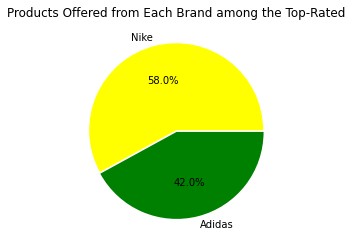

In [53]:
total_top = ratings["Product Name"].count()
nike_top = ratings[ratings["Brand"] == "Nike"]
nike_top = nike_top["Product Name"].count()
adidas_top = total_top - nike_top
print("The total number of Nike products among the Top-rated products: %d" % nike_top)
print("The total number of Adidas products among the Top-rated products: %d" % adidas_top)

t = [nike_top, adidas_top]
colors = ["yellow", "green"]
plt.title('Products Offered from Each Brand among the Top-Rated')
plt.pie(labels = ["Nike", "Adidas"], \
    x = t, autopct="%.1f%%", explode=[0.01]*2, colors=colors)
plt.show()

The average number of reviews for Nike is: 1.74
The average number of reviews for Adidas is: 45.56


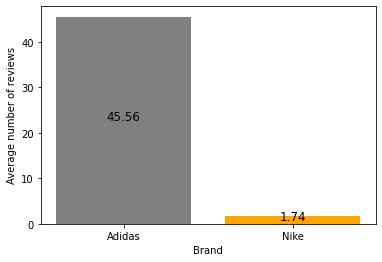

In [54]:
nike_rev = []
for product in ratings.values:
    if "Nike" in product[1]:
        nike_rev.append(product[2])
nike_avg_rev = sum(nike_rev) / len(nike_rev)
print("The average number of reviews for Nike is: %.2f" % nike_avg_rev)

adidas_rev = []
for product in ratings.values:
    if "Adidas" in product[1]:
        adidas_rev.append(product[2])
adidas_avg_rev = sum(adidas_rev) / len(adidas_rev)
print("The average number of reviews for Adidas is: %.2f" % adidas_avg_rev)

plt.bar(x = ["Adidas", "Nike"], height = [adidas_avg_rev, nike_avg_rev], color = ['grey','orange'])
plt.xlabel("Brand")
plt.ylabel("Average number of reviews")
plt.text(-0.1, adidas_avg_rev/2, "{:.2f}".format(adidas_avg_rev), fontsize=12)
plt.text(0.92, nike_avg_rev/2, "{:.2f}".format(nike_avg_rev), fontsize=12)
plt.show()